## Добавляем необходимые библиотеки

In [11]:
import pandas as pd
import seaborn as sns

## Чтение датасета

In [34]:
videogames = pd.read_csv("vgsales.csv")
videogames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
3,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
...,...,...,...,...,...,...,...,...,...,...
16534,LEGO Harry Potter: Years 5-7,PC,NaN,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0.0,0.03,0.22
16535,Happy Feet Two,DS,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0.0,0.01,0.12
16536,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0.0,0.01,0.10
16537,Happy Feet Two,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0.0,0.01,0.10


## Вытягивание из датасета столбца Genre и Global_Sales

In [37]:
GenceAndGlobal_Sales = pd.crosstab(videogames["Genre"], videogames["Global_Sales"], margins=True)

## Установка размера графика

In [38]:
sns.set(rc={"figure.figsize":(15, 4)})

## Формирование графика по стобцам

[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Sales(in millions)')]

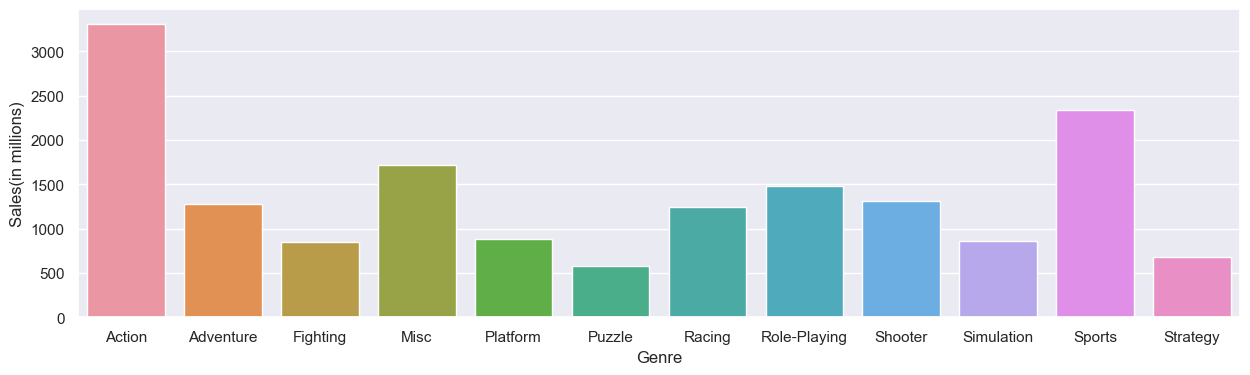

In [39]:
chart = sns.barplot(x=GenceAndGlobal_Sales["All"][:12].index, y=GenceAndGlobal_Sales["All"][:12])
chart.set(xlabel='Genre', ylabel='Sales(in millions)')